### ANDREA CHIANG

Assignment

- Read about spectral clustering module in Python's Scikit Learn Package.

- Choose a dataset from https://datasetsearch.research.google.com/.

- Perform spectral clustering from your chosen dataset, derive conclusions from the result.

- NOTE: You should have a different dataset from your classmates, otherwise both of you will recieve a failing grade.

- Push your codes to your github account. 

DATASET: Customer Shopping Trends Dataset from https://www.kaggle.com/datasets/thedevastator/global-video-game-sales

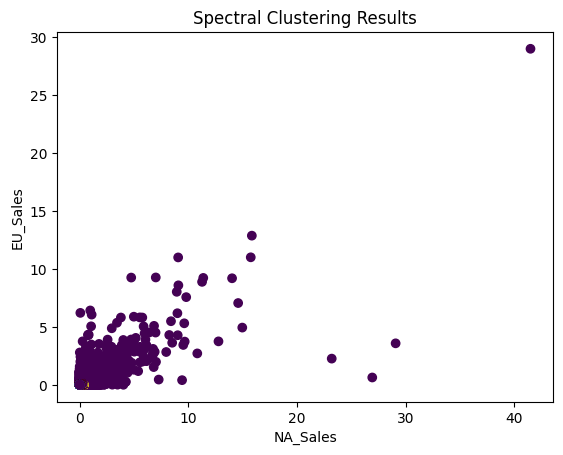

         NA_Sales  EU_Sales
Cluster                    
0        0.356343  0.200582
1        0.000000  0.000000
2        0.170000  0.020000
3        0.112256  0.034543


In [5]:
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load Your Dataset
data = pd.read_csv('vgsales.csv')

# Extract relevant features
sales_features = data[['NA_Sales', 'EU_Sales']]

# Handling missing values (if any)
sales_features = sales_features.dropna()

# Standardize the features
scaler = StandardScaler()
scaled_sales_features = scaler.fit_transform(sales_features)

# Perform Spectral Clustering
spectral_model = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42)

# Assuming 'cluster_labels' contains the cluster assignments
data['Cluster'] = cluster_labels

# Visualize the clusters
plt.scatter(data['NA_Sales'], data['EU_Sales'], c=data['Cluster'], cmap='viridis')
plt.xlabel('NA_Sales')
plt.ylabel('EU_Sales')
plt.title('Spectral Clustering Results')
plt.show()

# Analyze cluster characteristics
cluster_means = data.groupby('Cluster')[['NA_Sales', 'EU_Sales']].mean()
print(cluster_means)



Eigenvector Centrality Assignment 1

Given the following graph below, find it eigenvector centrality:

Eigenvector Centrality:
a: 0.51807347662071
b: 0.21182192277183212
c: 0.5986761070959697
d: 0.4566010978754134
e: 0.24477918831750853
f: 0.24477918831750853


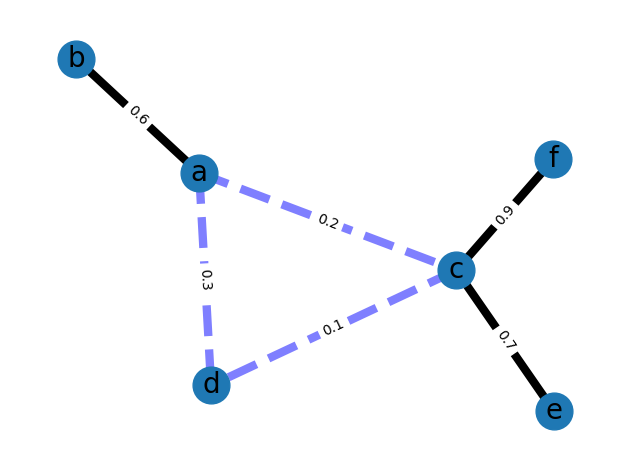

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Print the eigenvector centrality for each node
print("Eigenvector Centrality:")
for node, centrality in eigenvector_centrality.items():
    print(f"{node}: {centrality}")

# Visualization (similar to your code)
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed")

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()


Assignment 2

Read about the application of network science

1. https://medium.com/social-media-theories-ethics-and-analytics/network-analysis-from-social-media-data-with-networkx-13605d711590

2. http://snap.stanford.edu/class/cs224w-2011/proj/tbower_Finalwriteup_v1.pdf

3. Based on the readings provided; think about an interesting topic that you can find in Reddit (Not COVID-19, its already given in the reading material think of something else).

4. On the topic of your choosing develop a hypothesis and conduct a social network analysis. Find the eigenvector centrality. Which of the nodes are central in terms of eigenvectors? Develop a conclusion from your hypothesis.

My hypothesis is that the core of the community in the SteelSeries subreddit consists of users who interact with each other through comments on a regular basis (i.e., nodes with a high eigenvector centrality). These key players probably have a big say in how conversations are shaped, and their interactions make the community much more connected as a whole.

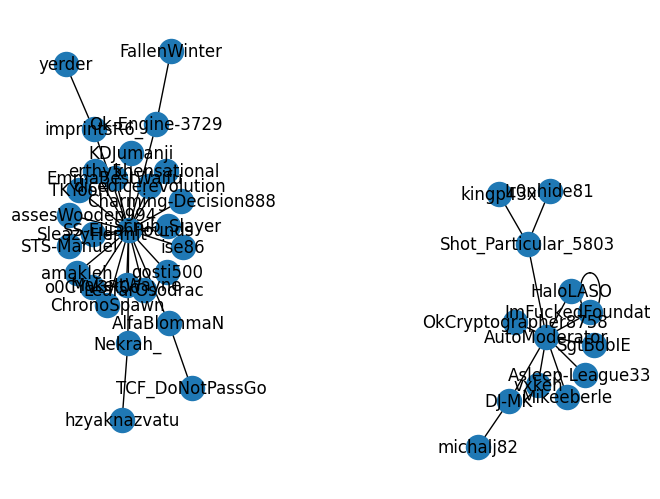

Top 5 Nodes by Eigenvector Centrality:
SS-ElijahPounds: 0.6990187466721733
MakeItWayne: 0.18561027603244531
LeafarOsodrac: 0.18561027603244531
Ok-Engine-3729: 0.15342007012325942
imprintsR6_: 0.15342007012325942


C:\Users\Andrea Chiang\AppData\Local\Programs\Python\Python311\Lib\site-packages\networkx\drawing\nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


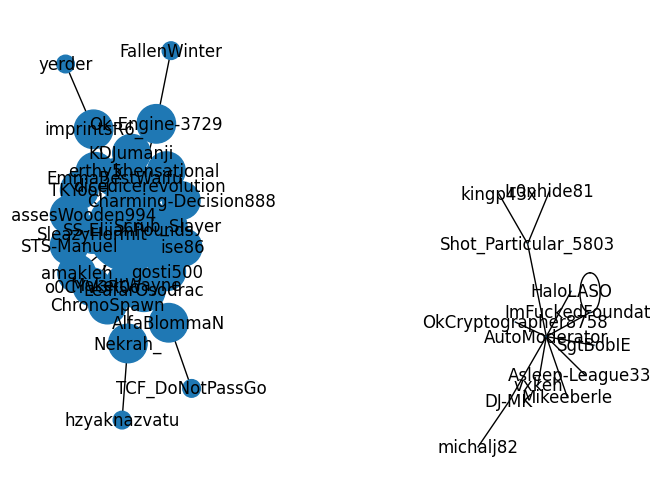

In [2]:
import praw
import networkx as nx
import matplotlib.pyplot as plt

# Reddit API credentials
reddit_client_id = 'mreGC67gvIw3h2DAO4_qOA'  
reddit_client_secret = 'Jj4sLPl1kPvd11WrMKsbGPLCSm4BKA'  
user_agent = 'tech by dreisfab'

# Create a Reddit instance
reddit = praw.Reddit(client_id=reddit_client_id,
                     client_secret=reddit_client_secret,
                     user_agent=user_agent)

# Function to get comments from a specific submission
def get_comments(submission):
    submission.comments.replace_more(limit=None)
    return submission.comments.list()

# Function to build a graph from comments
def build_graph(subreddit, submission_limit=10):
    G = nx.Graph()
    for submission in reddit.subreddit(subreddit).hot(limit=submission_limit):
        comments = get_comments(submission)
        for comment in comments:
            parent_author = comment.parent().author
            author = comment.author
            if parent_author and author:
                G.add_edge(parent_author, author)
    return G

# Function to calculate eigenvector centrality
def calculate_eigenvector_centrality(graph):
    centrality = nx.eigenvector_centrality(graph)
    return centrality

# Function to plot the graph
def plot_graph(graph, pos):
    nx.draw(graph, pos, with_labels=True)
    plt.show()

# Main script
# Main script
if __name__ == "__main__":
    subreddit_name = 'steelseries'  # Replace with your desired subreddit
    graph = build_graph(subreddit_name, submission_limit=10)
    
    pos = nx.spring_layout(graph)
    
    # Plot the graph with positions
    plot_graph(graph, pos)

    eigenvector_centrality = calculate_eigenvector_centrality(graph)
    sorted_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

    # Print the top 5 central nodes
    print("Top 5 Nodes by Eigenvector Centrality:")
    for node, centrality in sorted_centrality[:5]:
        print(f"{node}: {centrality}")

    # Draw the graph with node size based on eigenvector centrality
    node_size = [5000 * eigenvector_centrality[node] for node in graph.nodes]
    nx.draw(graph, pos, with_labels=True, node_size=node_size, cmap=plt.cm.Blues)
    plt.show()

Based on eigenvector centrality, the analysis identifies the most significant users in the SteelSeries subreddit. These users are essential to the community's connectivity and flow of information. If the theory is correct, the central nodes that have been identified play a major role in influencing conversations and encouraging participation in the subreddit. Additional qualitative examination of the contributions made by these key users could reveal details about the dynamics within the community.